# **CLUSTERING**

In [62]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
# reading the dataset
data=pd.read_csv('EastWestAirlines.csv')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [64]:
data.shape

(3999, 12)

In [65]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [67]:
# renaming columns
data= data.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [68]:
# printing all the values and counts for each variable

for column in data.columns:
  print(f"Values and counts for column '{column}':")
  print(data[column].value_counts())
  print("\n")

Values and counts for column 'ID':
ID
1       1
2691    1
2678    1
2679    1
2680    1
       ..
1351    1
1352    1
1353    1
1354    1
4021    1
Name: count, Length: 3999, dtype: int64


Values and counts for column 'Balance':
Balance
1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: count, Length: 3904, dtype: int64


Values and counts for column 'Qual_miles':
Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64


Values and counts for column 'cc1_miles':
cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64


Values and counts for column 'cc2_miles':
cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64


Values and counts for column 'cc3_miles':
cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: co

In [69]:
# check for null values
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [70]:
# check for duplicates

duplicates = data.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
data[duplicates]

Number of duplicate rows: 0


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


In [71]:
data=data.drop(['ID'],axis=1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Visualization

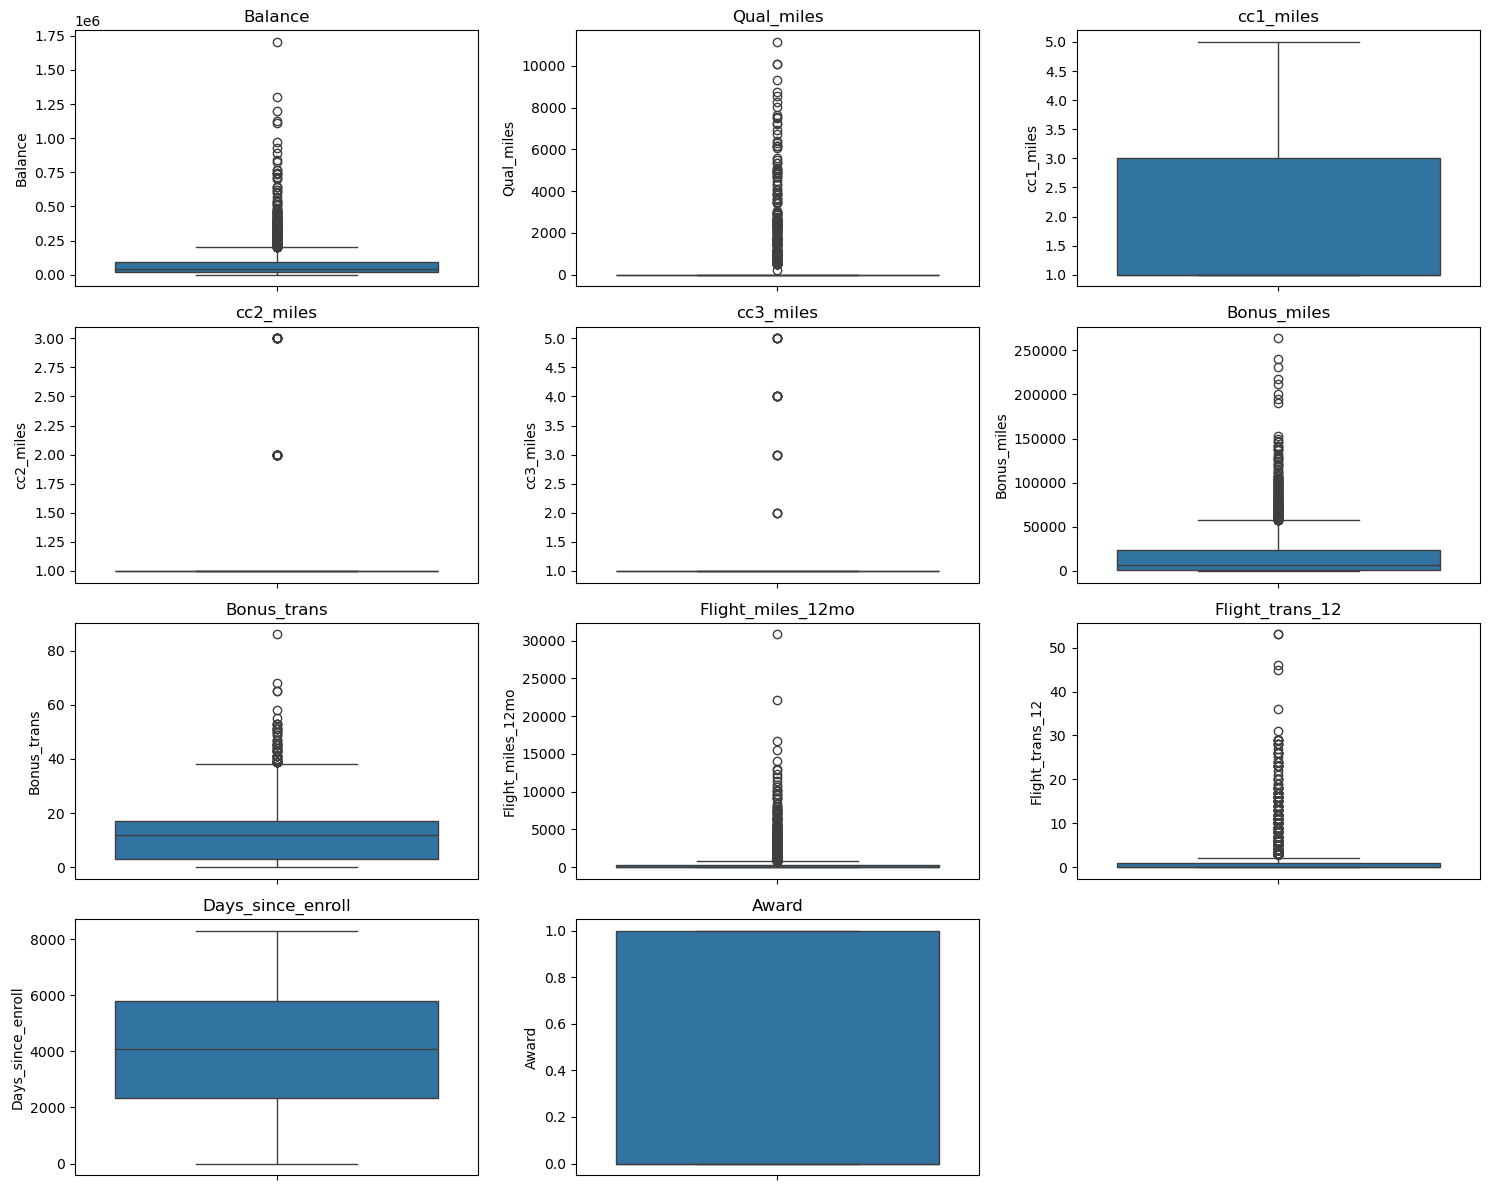

In [72]:
# boxplots of all numerical variables

plt.figure(figsize=(15, 12))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

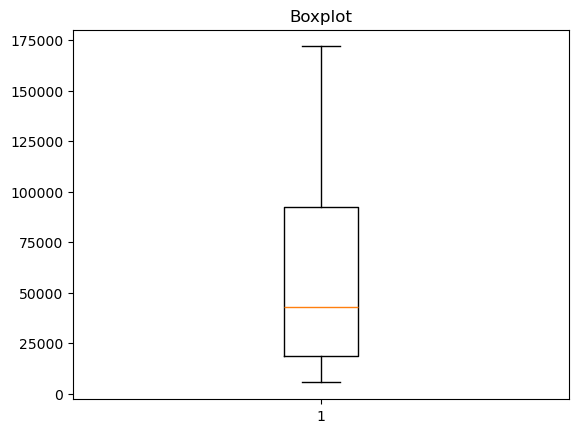

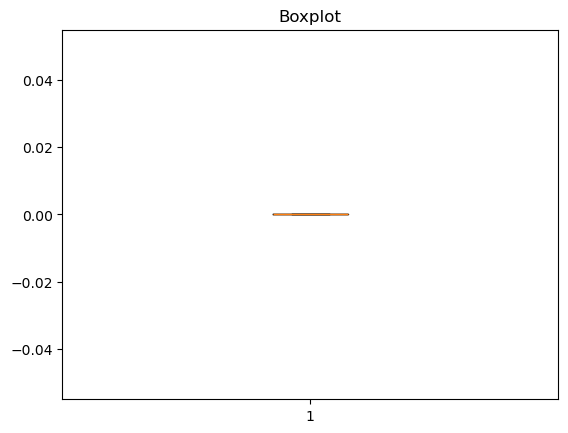

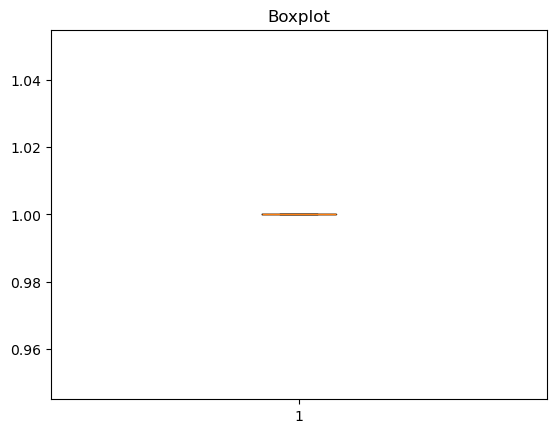

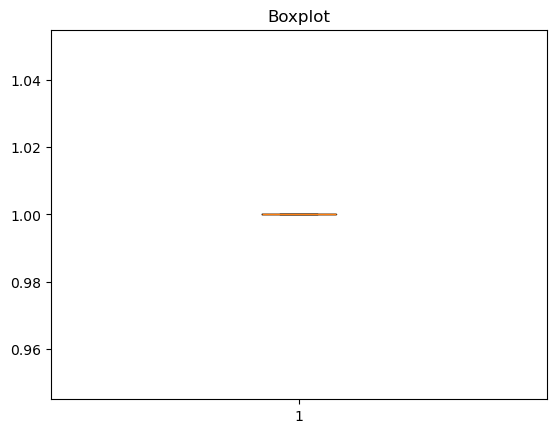

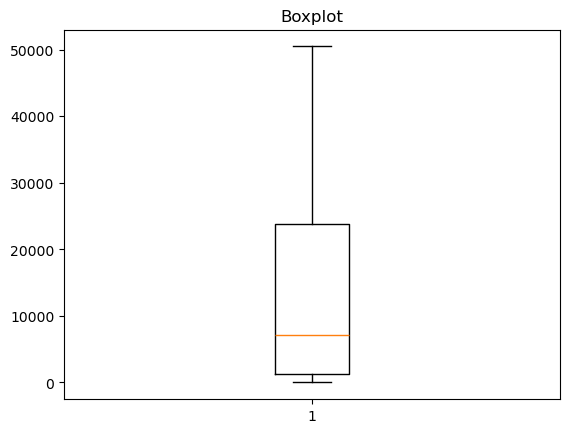

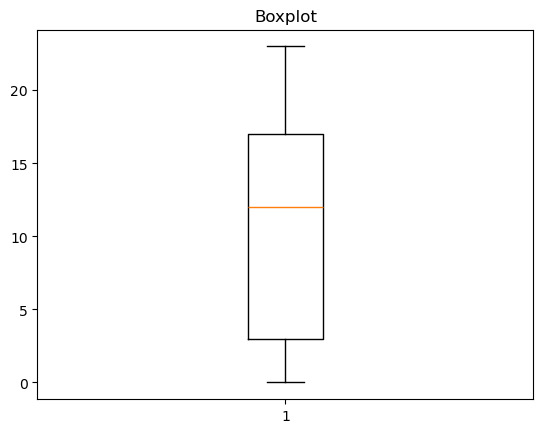

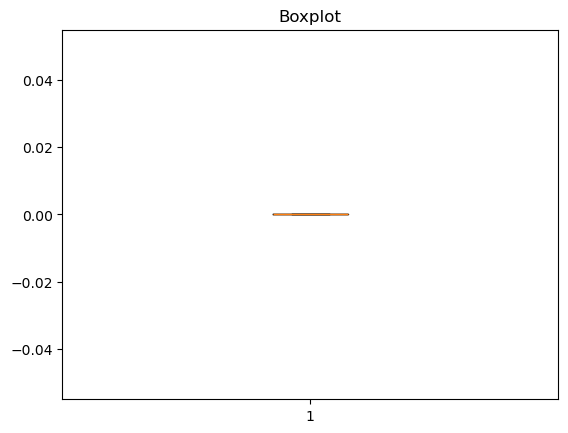

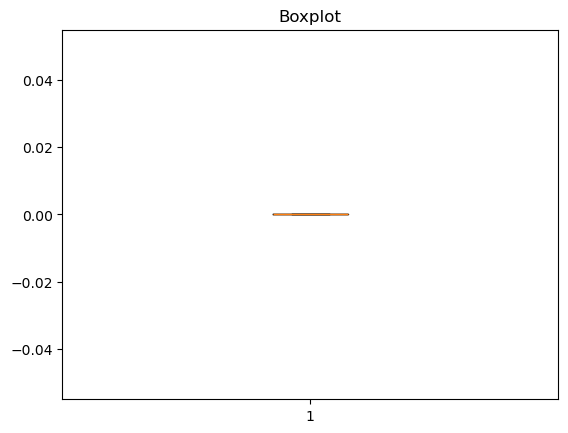

In [73]:
# removing outliers

from scipy.stats.mstats import winsorize

data['Balance']=winsorize(data.Balance,limits=[0.07, 0.093])
plt.boxplot(data['Balance']);plt.title('Boxplot');plt.show()

data['Qual_miles']=winsorize(data.Qual_miles,limits=[0.06, 0.094])
plt.boxplot(data['Qual_miles']);plt.title('Boxplot');plt.show()

data['cc2_miles']=winsorize(data.cc2_miles,limits=[0.02, 0.098])
plt.boxplot(data['cc2_miles']);plt.title('Boxplot');plt.show()

data['cc3_miles']=winsorize(data.cc3_miles,limits=[0.01, 0.099])
plt.boxplot(data['cc3_miles']);plt.title('Boxplot');plt.show()

data['Bonus_miles']=winsorize(data.Bonus_miles,limits=[0.08, 0.092])
plt.boxplot(data['Bonus_miles']);plt.title('Boxplot');plt.show()

data['Bonus_trans']=winsorize(data.Bonus_trans,limits=[0.01, 0.099])
plt.boxplot(data['Bonus_trans']);plt.title('Boxplot');plt.show()

data['Flight_miles_12mo']=winsorize(data.Flight_miles_12mo,limits=[0.15, 0.85])
plt.boxplot(data['Flight_miles_12mo']);plt.title('Boxplot');plt.show()

data['Flight_trans_12']=winsorize(data.Flight_trans_12,limits=[0.15, 0.85])
plt.boxplot(data['Flight_trans_12']);plt.title('Boxplot');plt.show()

In [74]:
#check the data for zero variance values
(data == 0).all()

Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo     True
Flight_trans_12       True
Days_since_enroll    False
Award                False
dtype: bool

In [75]:
# drop the features that have zero variance values
data1 = data
data1.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"], axis=1,inplace = True)
data1.columns

Index(['Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Days_since_enroll', 'Award'],
      dtype='object')

In [76]:
data1.describe()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.00000,3999.000000
mean,61461.036759,2.059515,1.0,1.0,14832.650413,10.754689,4118.55939,0.370343
std,52925.873305,1.376919,0.0,0.0,16787.927801,7.641353,2065.13454,0.482957
min,5500.000000,1.000000,1.0,1.0,0.000000,0.000000,2.00000,0.000000
25%,18527.500000,1.000000,1.0,1.0,1250.000000,3.000000,2330.00000,0.000000
50%,43097.000000,1.000000,1.0,1.0,7171.000000,12.000000,4096.00000,0.000000
75%,92404.000000,3.000000,1.0,1.0,23800.500000,17.000000,5790.50000,1.000000
max,171946.000000,5.000000,1.0,1.0,50488.000000,23.000000,8296.00000,1.000000


(array([1172.,  700.,  473.,  358.,  252.,  203.,  156.,  141.,  106.,
         438.]),
 array([  5500. ,  22144.6,  38789.2,  55433.8,  72078.4,  88723. ,
        105367.6, 122012.2, 138656.8, 155301.4, 171946. ]),
 <BarContainer object of 10 artists>)

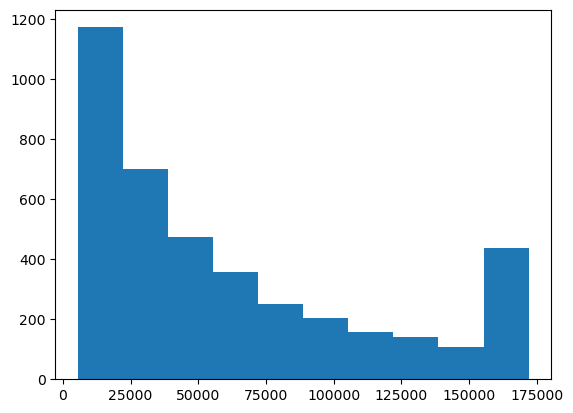

In [77]:
#histogram
plt.hist(data1["Balance"])


(array([144., 400., 549., 462., 476., 529., 453., 465., 288., 233.]),
 array([2.0000e+00, 8.3140e+02, 1.6608e+03, 2.4902e+03, 3.3196e+03,
        4.1490e+03, 4.9784e+03, 5.8078e+03, 6.6372e+03, 7.4666e+03,
        8.2960e+03]),
 <BarContainer object of 10 artists>)

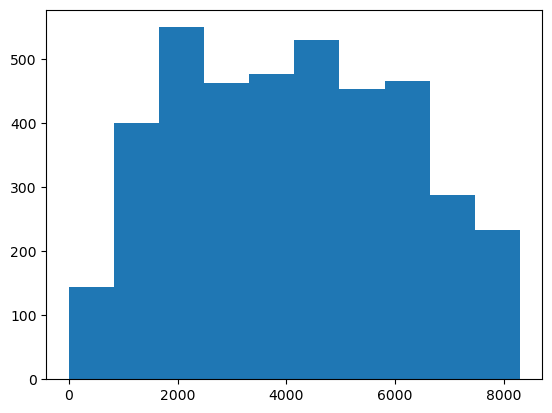

In [78]:
plt.hist(data1["Days_since_enroll"])



Text(0, 0.5, 'Balance')

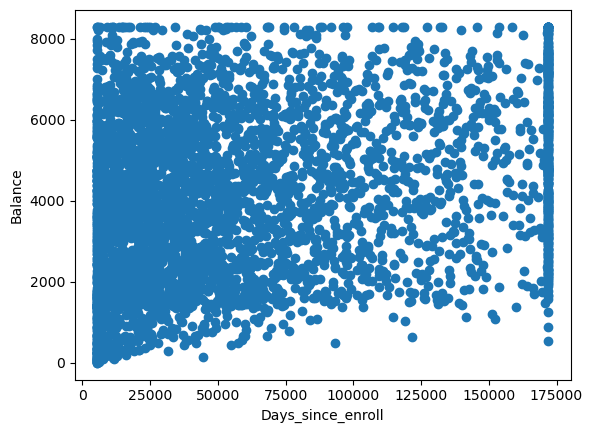

In [79]:
#scatter plot
plt.scatter(data1["Balance"], data["Days_since_enroll"]);plt.xlabel('Days_since_enroll');plt.ylabel('Balance')   #Bivariate



In [80]:
data1.skew(axis = 0, skipna = True)

Balance              0.919098
cc1_miles            0.857569
cc2_miles            0.000000
cc3_miles            0.000000
Bonus_miles          1.042812
Bonus_trans          0.067852
Days_since_enroll    0.120174
Award                0.537200
dtype: float64

In [81]:
data1.kurtosis(axis = 0, skipna = True)
data1.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,28143,1,1,1,174,1,7000,0
1,19244,1,1,1,215,2,6968,0
2,41354,1,1,1,4123,4,7034,0
3,14776,1,1,1,500,1,6952,0
4,97752,4,1,1,43300,23,6935,1


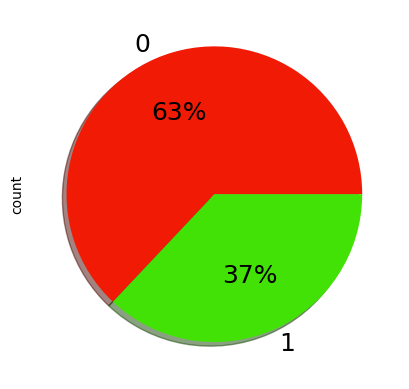

In [82]:
# award status

data1['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18',
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

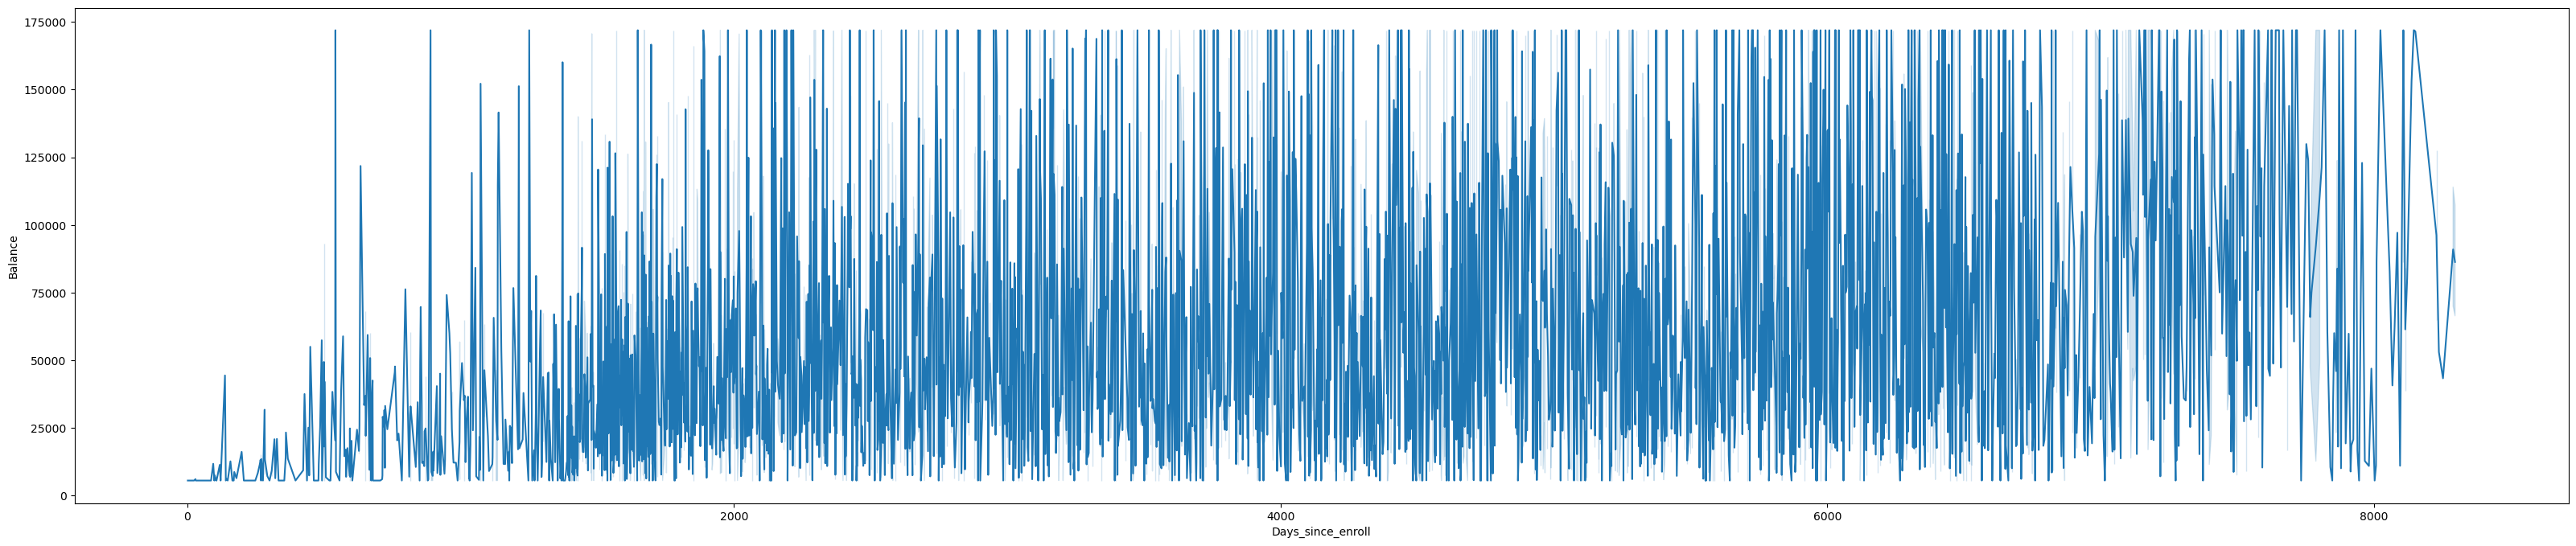

In [83]:
# trend between balance miles & no. of days since enroll

fig, ax =plt.subplots(figsize=(40,8))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data1)

In [84]:
# correlaton matrix
data1.corr()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
Balance,1.000000,0.458591,NaN,NaN,0.503505,0.427294,0.284963,0.166912
cc1_miles,0.458591,1.000000,NaN,NaN,0.914469,0.662007,0.230849,0.335457
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.503505,0.914469,NaN,NaN,1.000000,0.688626,0.216657,0.396884
Bonus_trans,0.427294,0.662007,NaN,NaN,0.688626,1.000000,0.187227,0.340733
Days_since_enroll,0.284963,0.230849,NaN,NaN,0.216657,0.187227,1.000000,0.188121
Award,0.166912,0.335457,NaN,NaN,0.396884,0.340733,0.188121,1.000000


In [85]:
data1=data1.drop(data1.columns[[2,3]],axis=1)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,28143,1,174,1,7000,0
1,19244,1,215,2,6968,0
2,41354,1,4123,4,7034,0
3,14776,1,500,1,6952,0
4,97752,4,43300,23,6935,1


### Data Preprocessing

In [86]:
# standardization
from sklearn import preprocessing   #package for normalize
data_normalized = preprocessing.normalize(data1)
data_normalized  = pd.DataFrame(data_normalized,columns=data1.columns)
data_normalized.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,0.970414,0.000034,0.006000,0.000034,0.241371,0.000000
1,0.940209,0.000049,0.010504,0.000098,0.340437,0.000000
2,0.981113,0.000024,0.097817,0.000095,0.166880,0.000000
3,0.904428,0.000061,0.030605,0.000061,0.425527,0.000000
4,0.912398,0.000037,0.404154,0.000215,0.064730,0.000009


### Hierarchical Clustering

In [87]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [88]:
# Finding the Distance using Euclidean Distance with Complete (maximum) linkage
z = linkage(data_normalized, method = "complete", metric = "euclidean")

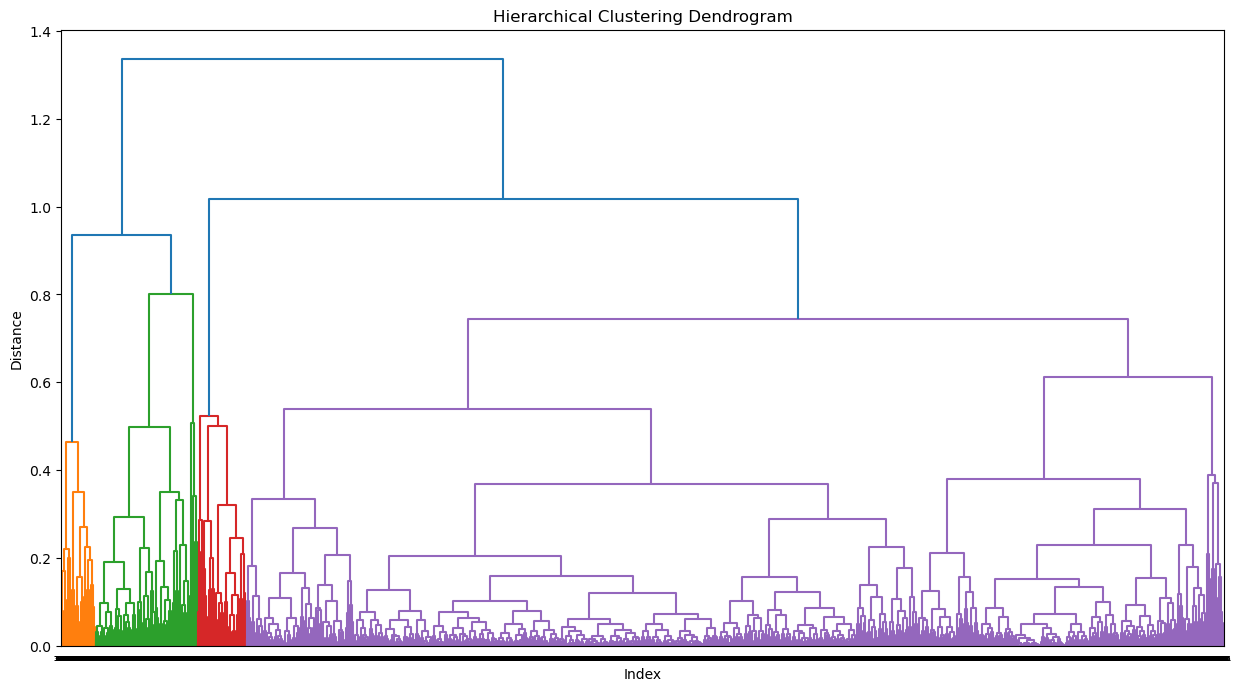

In [89]:
# Now we plot the dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

#### Number of clusters from the dendogram is "4"

### AgglomerativeClustering(single linkage method)

In [90]:
# AgglomerativeClustering (single linkage)

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
data1["agg_sing"] = cluster.fit_predict(data_normalized)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,agg_sing
0,28143,1,174,1,7000,0,0
1,19244,1,215,2,6968,0,0
2,41354,1,4123,4,7034,0,0
3,14776,1,500,1,6952,0,0
4,97752,4,43300,23,6935,1,0


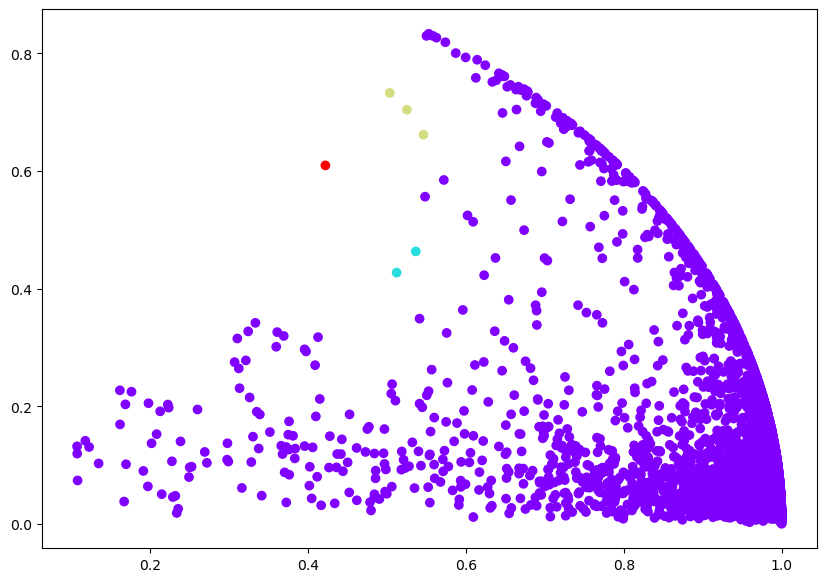

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(data_normalized.iloc[:,0], data_normalized.iloc[:,4], c=cluster.labels_, cmap='rainbow')

In [92]:
# Silhouttte score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_normalized,data1["agg_sing"])
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.48


In [93]:
# group them by clusters
data1.iloc[:, 0:].groupby(data1.agg_sing).mean()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,agg_sing
agg_sing,,,,,,,
0,61544.331831,2.060606,14844.089907,10.753318,4114.215377,0.369396,0.0
1,7084.500000,1.000000,9698.500000,9.500000,6037.000000,1.000000,1.0
2,5500.000000,1.333333,5058.000000,12.333333,7346.000000,1.000000,2.0
3,5500.000000,2.000000,8747.000000,14.000000,7945.000000,1.000000,3.0


In [94]:
a = data1['agg_sing'].value_counts()

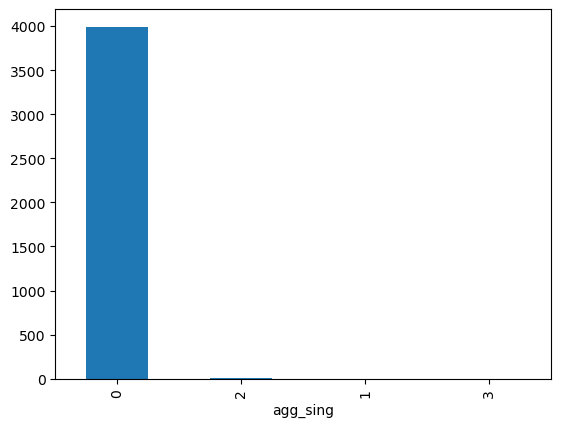

In [95]:
# count plot for different clusters
a.plot(kind = 'bar')
plt.show()

In [96]:
data1=data1.drop(['agg_sing'],axis=1)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,28143,1,174,1,7000,0
1,19244,1,215,2,6968,0
2,41354,1,4123,4,7034,0
3,14776,1,500,1,6952,0
4,97752,4,43300,23,6935,1


### AgglomerativeClustering(complete linkage method)

In [97]:
# AgglomerativeClustering(complete linkage method)


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
data1["agg_comp"] = cluster.fit_predict(data_normalized)
data1.head()


,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,agg_comp
0,28143,1,174,1,7000,0,1
1,19244,1,215,2,6968,0,1
2,41354,1,4123,4,7034,0,1
3,14776,1,500,1,6952,0,1
4,97752,4,43300,23,6935,1,1


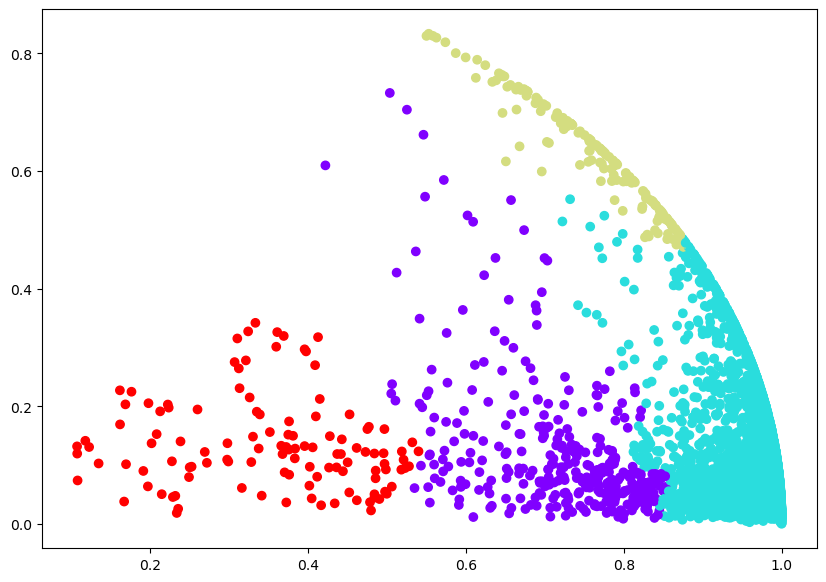

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(data_normalized.iloc[:,0], data_normalized.iloc[:,4], c=cluster.labels_, cmap='rainbow')

In [99]:
# Silhouttte score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_normalized,data1["agg_comp"])
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.51


In [100]:
# group them by clusters
data1.iloc[:, 0:].groupby(data1.agg_comp).mean()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,agg_comp
agg_comp,,,,,,,
0,35918.823362,3.270655,30984.119658,15.672365,4150.310541,0.792023,0.0
1,68529.980369,1.945568,13155.798929,10.463712,4030.110351,0.313504,1.0
2,7040.821429,1.000000,707.416667,2.845238,5578.833333,0.184524,2.0
3,13512.940678,3.211864,34675.432203,15.677966,4465.127119,1.000000,3.0


In [101]:
a = data1['agg_comp'].value_counts()

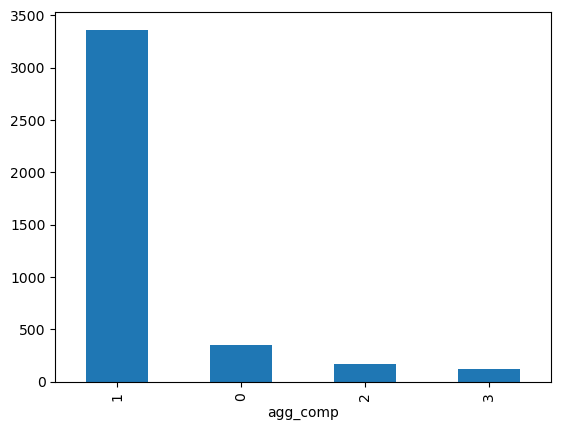

In [102]:
# count plot for different clusters
a.plot(kind = 'bar')
plt.show()

### KMeans Clustering


In [103]:
data1=data1.drop(['agg_comp'],axis=1)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,28143,1,174,1,7000,0
1,19244,1,215,2,6968,0
2,41354,1,4123,4,7034,0
3,14776,1,500,1,6952,0
4,97752,4,43300,23,6935,1


In [104]:
data_normalized.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,0.970414,0.000034,0.006000,0.000034,0.241371,0.000000
1,0.940209,0.000049,0.010504,0.000098,0.340437,0.000000
2,0.981113,0.000024,0.097817,0.000095,0.166880,0.000000
3,0.904428,0.000061,0.030605,0.000061,0.425527,0.000000
4,0.912398,0.000037,0.404154,0.000215,0.064730,0.000009


In [105]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4, n_init=20)
data1["K_Cluster"] = cluster.fit_predict(data_normalized)

data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,K_Cluster
0,28143,1,174,1,7000,0,0
1,19244,1,215,2,6968,0,2
2,41354,1,4123,4,7034,0,0
3,14776,1,500,1,6952,0,2
4,97752,4,43300,23,6935,1,3


In [106]:
data1['K_Cluster'].value_counts()

K_Cluster
0    1999
3    1235
2     388
1     377
Name: count, dtype: int64

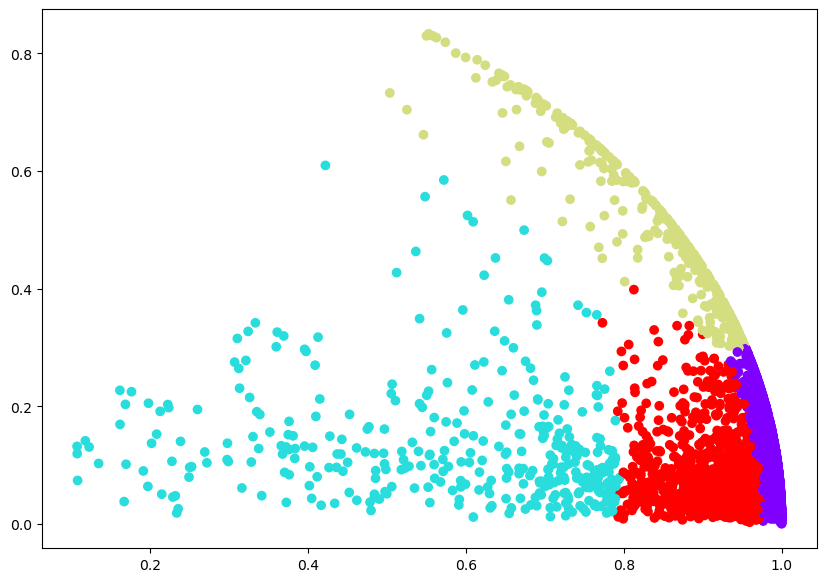

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(data_normalized.iloc[:,0], data_normalized.iloc[:,4], c=cluster.labels_, cmap='rainbow')

In [108]:
# Silhouttte score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_normalized,data1["K_Cluster"])
print("Silhouttte score: ",score.round(2))




Silhouttte score:  0.51


In [109]:
# group them by clusters
data1.iloc[:, 0:].groupby(data1.K_Cluster).mean()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,K_Cluster
K_Cluster,,,,,,,
0,67939.636818,1.356178,5840.771386,7.874437,3850.020010,0.243122,0.0
1,24742.201592,3.137931,30889.411141,15.389920,4258.933687,0.880637,1.0
2,10114.201031,1.005155,1027.595361,3.489691,5293.750000,0.206186,2.0
3,78315.167611,3.200000,28822.714170,16.284211,4141.162753,0.472065,3.0


In [110]:
a = data1['K_Cluster'].value_counts()

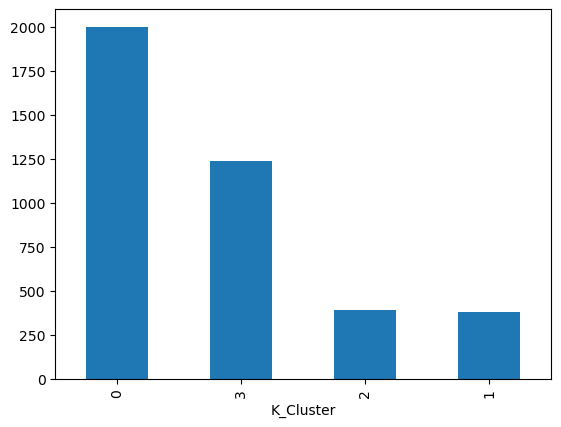

In [111]:
# count plot for different clusters
a.plot(kind = 'bar')
plt.show()

In [112]:
scores= []
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    data1["K_Cluster"] = cluster.fit_predict(data_normalized)
    scores.append(silhouette_score(data_normalized,data1["K_Cluster"]))
scores



[0.5542814062733502,
 0.5247967170105504,
 0.5055040978203033,
 0.48326401449606027,
 0.4817050567769848,
 0.46221147489658315,
 0.4671042721861505,
 0.41281788063255215,
 0.41066426786144333]

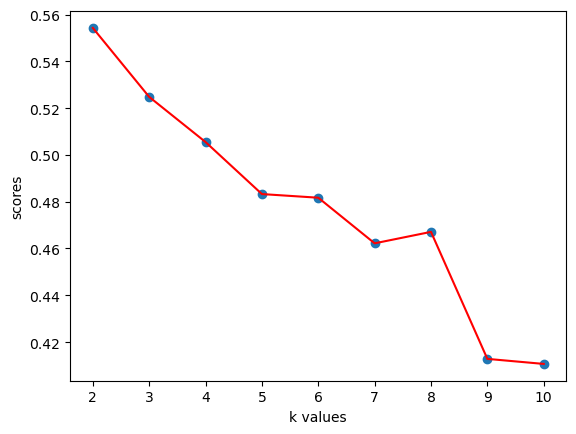

In [113]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel("k values")
plt.ylabel("scores")
plt.show()

### DB Scan

In [114]:
data1=data1.drop(['K_Cluster'],axis=1)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,28143,1,174,1,7000,0
1,19244,1,215,2,6968,0
2,41354,1,4123,4,7034,0
3,14776,1,500,1,6952,0
4,97752,4,43300,23,6935,1


In [115]:
data_normalized.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,0.970414,0.000034,0.006000,0.000034,0.241371,0.000000
1,0.940209,0.000049,0.010504,0.000098,0.340437,0.000000
2,0.981113,0.000024,0.097817,0.000095,0.166880,0.000000
3,0.904428,0.000061,0.030605,0.000061,0.425527,0.000000
4,0.912398,0.000037,0.404154,0.000215,0.064730,0.000009


In [116]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.049,min_samples=6)
data1["Dbscan"] = cluster.fit_predict(data_normalized)
data1.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,Dbscan
0,28143,1,174,1,7000,0,0
1,19244,1,215,2,6968,0,0
2,41354,1,4123,4,7034,0,0
3,14776,1,500,1,6952,0,0
4,97752,4,43300,23,6935,1,0


In [117]:
data1["Dbscan"].value_counts()

Dbscan
 0    3904
-1      70
 1      10
 2       9
 3       6
Name: count, dtype: int64

Here -1 treated as outliers

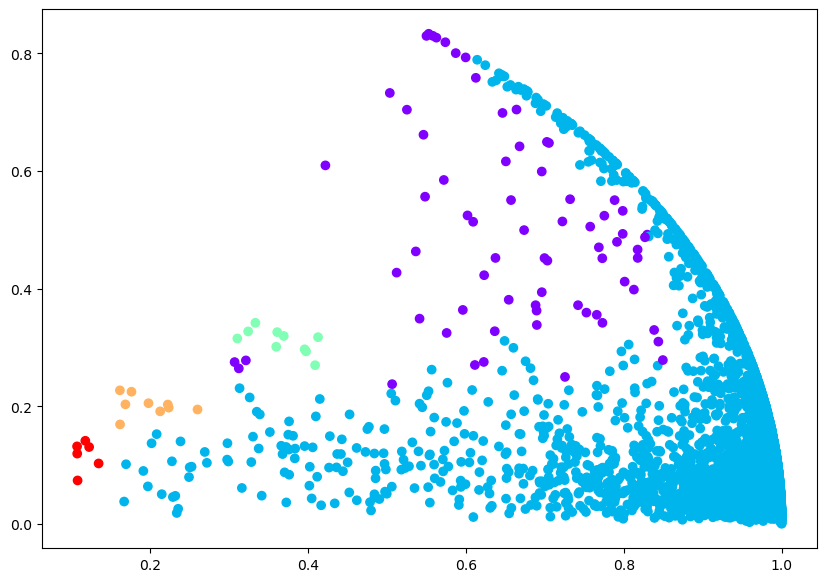

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(data_normalized.iloc[:,0], data_normalized.iloc[:,4], c=cluster.labels_, cmap='rainbow')

In [119]:
# Silhouttte score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_normalized,data1["Dbscan"])
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.45


In [120]:
a = data1['Dbscan'].value_counts()

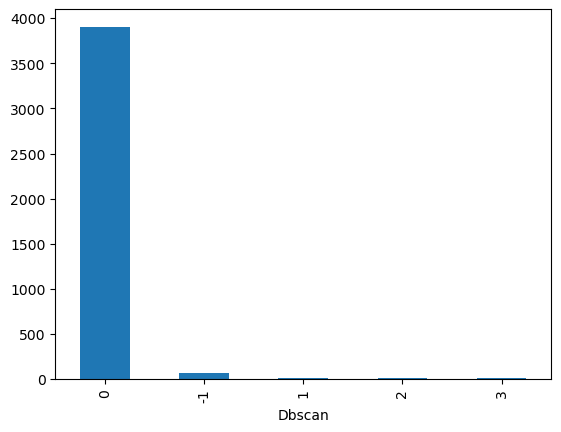

In [121]:
# count plot for different clusters
a.plot(kind = 'bar')
plt.show()

Upon analysis and intepretation Agglomerative (complete linkage) and K-means clustering methods provided the best clustering style and good Silhouttte score among the different clustering methods used.